(1, 3)

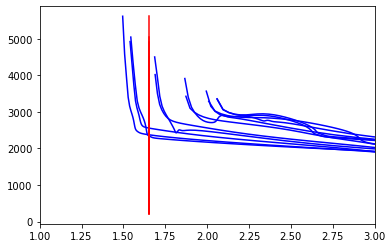

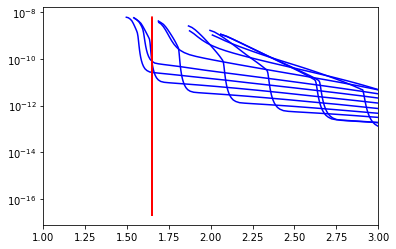

In [23]:
# Read darwin-dat-files
#
# extract 
# Radius, Density, and T_gas - columns
# all are in cgs
#
import matplotlib.pyplot as plt

c5d_star_r_au = 1.651
AUcm = 1.49598e13


modelname = 'M2n315u6'
steplist = [
    '230561',
    '230671',
    '230721',
    '230791',
    '230871',
    '231001',
    '231121',
    '231191',
    '231251',
    '231321',
    '231521'
]



for stepnumber in steplist:

    path = f'../darwin_data/{modelname}_sel/model.{stepnumber}.dat'

    radius_cm = []
    radius_au = []
    gas_density = []
    gas_temperature = []


    with open(path, 'r') as f:
        for nn,line in enumerate(f.readlines()):
            if nn > 18:

                line_list = line.strip().split('  ')

                radius_cm.append(float(line_list[0]))
                radius_au.append(float(line_list[0])/AUcm)
                gas_density.append(float(line_list[1]))
                gas_temperature.append(float(line_list[2]))


    plt.figure(1)
    plt.plot(radius_au,gas_temperature,'b')
    plt.plot(
        [c5d_star_r_au,c5d_star_r_au],
        [min(gas_temperature),max(gas_temperature)],'r'
    )


    plt.figure(2)
    plt.plot(radius_au,gas_density,'b')
    plt.plot(
        [c5d_star_r_au,c5d_star_r_au],
        [min(gas_density),max(gas_density)],'r'
    )
    plt.yscale('log')

plt.figure(1)
plt.xlim(1,3)
plt.figure(2)
plt.xlim(1,3)



Så, hur göra?

1. definiera stjärnan

 * först leta upp vilka data som faktiskt går innanför c5d-stjärnan?
  - eller ska jag försöka normalisera om stjärnan till en sån?
  - samma sak med temperaturen dåju

 * eller ta en medelstjärna av alla data? och sen normalisera om den till en som uppfyller samma storlek o temperatur som co5boldstjärnan?

2. stuva in det i r3d-gridet
 * dvs, sfäriska koordinater, översätta densiteter, temperaturer till data för varje gridcell
 * allt som är inom stjärnan kan ju sättas till konstant densitet o temperatur
 * och så ska radien inte gå utanför co5bold-kuben. Dvs jag inför nog gas-fördelning hela vägen? eller ska jag bara ha gasfördelning upp till en viss radie ovanför stjärnans yta o sen gå över till co5boldgas?
  - med tanke på att med pnktkällorna har jag ingen gas alls, bara stoft så tror jag på det förnämnda mer

In [25]:
import numpy as np

r3d_radius_au = np.linspace(0,30,50)
r3d_radius_au.size

50

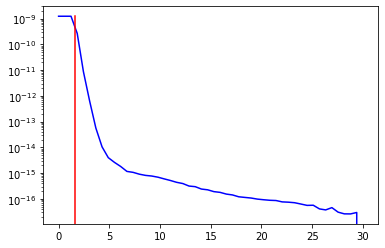

In [52]:
# Test to make an average darwin-star
#
# extract 
# Radius, Density, and T_gas - columns
# all are in cgs
#
import matplotlib.pyplot as plt
import numpy as np

c5d_star_r_au = 1.651
AUcm = 1.49598e13


modelname = 'M2n315u6'
steplist = [
    '230561',
    '230671',
    '230721',
    '230791',
    '230871',
    '231001',
    '231121',
    '231191',
    '231251',
    '231321',
    '231521'
]

# Define grid to average into

Nr3d = 50

r3d_radius_au = np.linspace(0,30,Nr3d)
r3d_gas_density = np.zeros(Nr3d)
r3d_cell_counter = np.zeros(Nr3d)



for stepnumber in steplist:

    path = f'../darwin_data/{modelname}_sel/model.{stepnumber}.dat'

    radius_cm = 0
    radius_au = 0

    with open(path, 'r') as f:
        for nn,line in enumerate(f.readlines()):
            if nn > 18:

                line_list = line.strip().split('  ')

                radius_cm = float(line_list[0])
                radius_au = float(line_list[0])/AUcm

                # check where this is closest in r3dradius
                for nr in range(Nr3d - 1):
                    if radius_au >= r3d_radius_au[nr] and radius_au < r3d_radius_au[nr+1]:
                        r3d_gas_density[nr] += float(line_list[1])
                        r3d_cell_counter[nr] += 1
                        #gas_temperature = float(line_list[2])

# Take constant values inside the star
for nr in range(int(-0.5*(Nr3d - 1)),1):
    nr *= -1

    if r3d_gas_density[nr] == 0:
        r3d_gas_density[nr] = r3d_gas_density[nr+1]
        r3d_cell_counter[nr] = r3d_cell_counter[nr+1]



# And take previous number 

# TODO fix the outer edge, there are more data outside the grid, maybe, or just take
# the radial previous number!


# And remove zeros from cell_counter
for nr,cell_count in enumerate(r3d_cell_counter):
    if cell_count == 0:
        r3d_cell_counter[nr] = 1

# Average the gas density
r3d_gas_density /= r3d_cell_counter

plt.figure(1)
plt.plot(r3d_radius_au,r3d_gas_density,'b')
plt.plot(
    [c5d_star_r_au,c5d_star_r_au],
    [r3d_gas_density.min(),r3d_gas_density.max()],'r'
)
plt.yscale('log')


In [51]:
r3d_gas_density

array([1.31193153e-07, 1.31193153e-07, 1.31193153e-07, 4.20108786e-08,
       1.17266234e-09, 6.51028496e-11, 5.81487754e-12, 8.80388565e-13,
       2.43327613e-13, 1.20012693e-13, 6.14964389e-14, 2.79476967e-14,
       1.60422854e-14, 9.99328620e-15, 8.15218460e-15, 6.15711270e-15,
       4.85571110e-15, 4.17603520e-15, 3.61627610e-15, 2.63379140e-15,
       2.35722090e-15, 1.88458870e-15, 1.48508050e-15, 1.43970720e-15,
       8.97193200e-16, 1.14365120e-15, 3.56875000e-16, 9.18497500e-16,
       7.08445900e-16, 3.60599400e-16, 5.67517100e-16, 3.22174000e-16,
       1.95313180e-16, 4.61461170e-16, 3.51573610e-16, 1.72072550e-16,
       2.28425500e-16, 3.70554140e-16, 2.11904370e-16, 1.25754050e-16,
       2.22763640e-16, 2.25518200e-16, 1.21874660e-16, 1.11338530e-16,
       4.55412600e-17, 1.82162560e-16, 5.21549400e-17, 5.18743100e-17,
       2.94638400e-17, 0.00000000e+00])

In [ ]:
range()